# BINGO-Hackaton
**Luciano Barosi**
*BINGO Collaboration*

## Supernovas and the Accelerating Universe

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from urllib.request import urlopen # That is an useful package

Let's fetch the Supernova Data directly from a URL, read it line by line and construct our data

In [4]:
SN_list = []
z_array = np.array([])
mod_array = np.array([])
moderr_array = np.array([])
f = urlopen('http://supernova.lbl.gov/Union/figures/SCPUnion2_mu_vs_z.txt')
for line in f:
    pieces = line.decode('utf8').split('\n')
    # Header of data is commentd out, we do not need this
    # Data format is SN name, redshift, distance modulos, error 
    if '#' in pieces[0]: continue
    SN, z, mod, moderr = line.split()
    SN_list.append(SN)
    z_array = np.append(z_array,np.float64(z))
    mod_array = np.append(mod_array,np.float64(mod))
    moderr_array = np.append(moderr_array,np.float64(moderr))
#Always close you IO channels.
f.close()

Let's plot the data

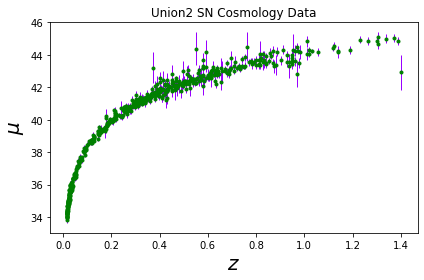

In [5]:
fig = plt.figure()
plt.errorbar(z_array, mod_array, yerr=moderr_array, fmt='.', capsize=0,
    elinewidth=1.0, ecolor=(0.6,0.0,1.0), color='green' )
plt.xlabel(r'$z$', fontsize=20)
plt.ylabel(r'$\mu$', fontsize=20)
plt.title("Union2 SN Cosmology Data")
plt.tight_layout()

### Distance Modulus and Magnitude
$$\mu = m - M $$ 
$$\mu = 5 (\mathrm{Log}_{10}(d) - 1)$$
**Distances are measured in parsec**

**Absolute magnitude: 10 pc**
Let's show the plot with distances.

In [7]:
def distance_Mpc(m,z):
    return 0.00001 * (10**(m/5)) / (1.0 + z)
d_array = distance_Mpc(mod_array,z_array)
#We need to calculate the errorbars for distances
d_error_plus  = ( distance_Mpc((mod_array+moderr_array),z_array) - d_array )
d_error_minus = ( d_array - distance_Mpc((mod_array-moderr_array),z_array) )

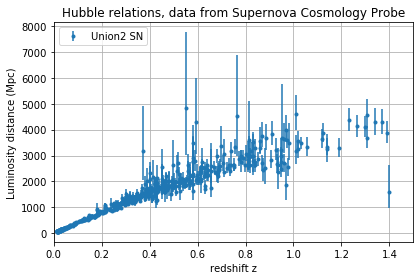

In [13]:
dlabel = 'Union2 SN'
plt.figure()
plt.errorbar(z_array,d_array, yerr=(d_error_minus,d_error_plus),fmt='.',label=dlabel)
plt.xlim([0,1.5])
plt.xlabel('redshift z')
plt.ylabel('Luminosity distance (Mpc)')
plt.grid(b=True,which='both')
plt.legend(loc='upper left')
plt.title('Hubble relations, data from Supernova Cosmology Probe')
plt.tight_layout()

$$ds^2 = -dt^2 + a²(t)\left[dr^2 + r^2d\Omega^2 \right] $$

where we assumed the universe spatially flat.
Plug this in the Einstein equation:

$$ R_{\mu\nu}-\frac{1}{2}g_{\mu\nu}R = 8\pi GT_{\mu\nu}$$

and consider the universe to be filled by componentes such that

$$T_{\mu\nu}= \rho u_\mu u_\nu + P (g_{\mu\nu} + u_\mu u_\nu) $$

with the four-velocity given by 

$$u^\mu = (1,0,0,0)$$

You will find the Hubble ,the acceleration and the continuity equation:

$$ H^2 =\frac{8 \pi G}{3}\rho$$

$$\dot \rho + 3 H (\rho + P) = 0$$

$$\frac{\ddot a}{a} = -\frac{-4\pi G}{3}(\rho + 3P)$$

$$\rho_c = \frac{3 {H_0}^2}{8\pi G}$$

Podemos escrever a equação de friedman em termos do parâmetro de densidade das componentes do universo. Consideremos o universo composto por matéria fria e energia escura, negligenciando a contribuição de radiação e curvatura.

A distância comóvel pode ser lida do elemento de linha (recolocando fatores de c):

$$\frac{H^2}{{H_0}^2} =  \Omega_\Lambda + \Omega_M$$

A distância comóvel pode ser lida do elemento de linha (recolocando fatores de c):

$$\chi = \int_{t_em}^{t_0} \frac{c dt}{a(t)} = \int_a^1 \frac{c da}{H a^2} $$

A distância de luminosidade deve levar em conta a maneira como a radiação se propaga no espaço e a perda de energia da luz devido ao redshift:

$$ d_L = (1+z)\chi$$

Usando a equação de Friedman podemos escrever expressões integrais para estas distâncias e podemos mudar a variável para z na integração.

$$d_L = (1+z) \frac{c}{H_0} \int_0^z \frac{dz}{\sqrt{\Omega_M (1+z)^3 + \Omega_\Lambda}}$$

Since we are considering a spatially flat universe, there is a constrain:

$$\Omega_\Lambda + \Omega_M = 1$$

And we have a two parameter model to fit our data.